# Try Test Time Augmentation and Compare to baseline model

## Imports

In [5]:
import os, sys

sys.path.insert(0, os.pardir)

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import torchvision.transforms as T
from torchvision.transforms import functional as F

# TTA Lib
import src.data.ttach as tta

from src.data.transforms import TTARandomRotation, TTARandomPerspective, TTAElasticTransform, TTAHorizontalFlip, TTAVerticalFlip


import src.constant as cst

## Visualize TTA

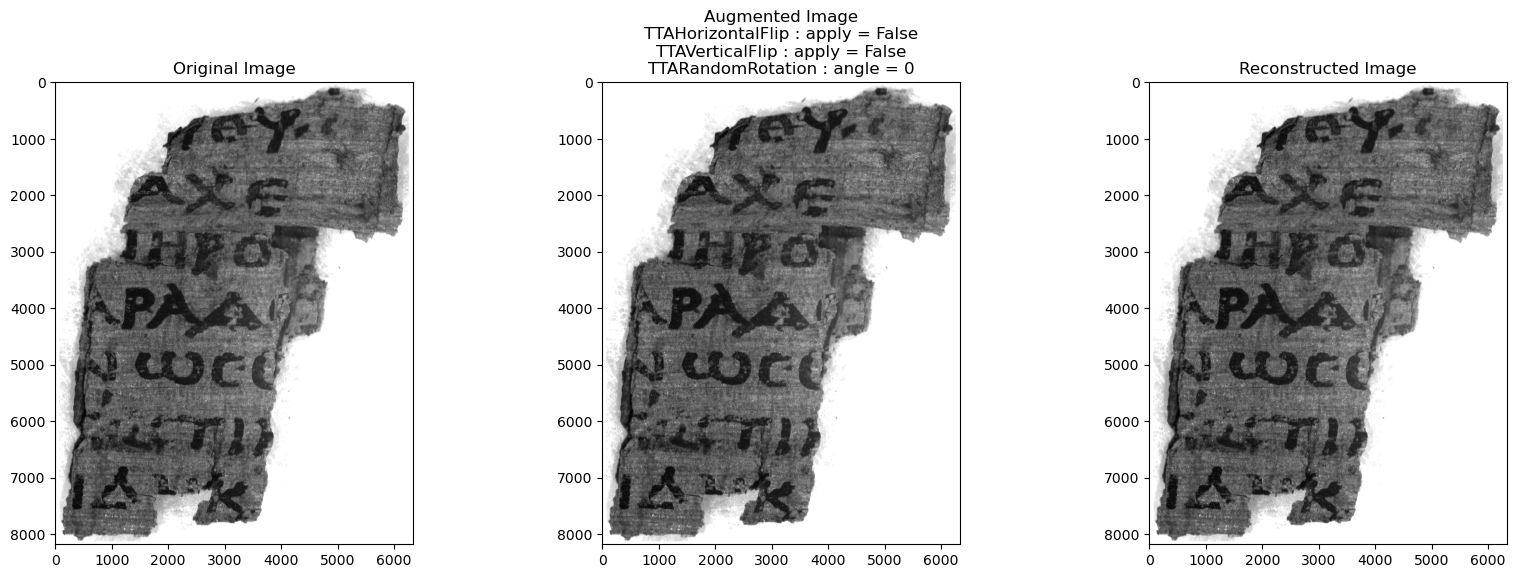

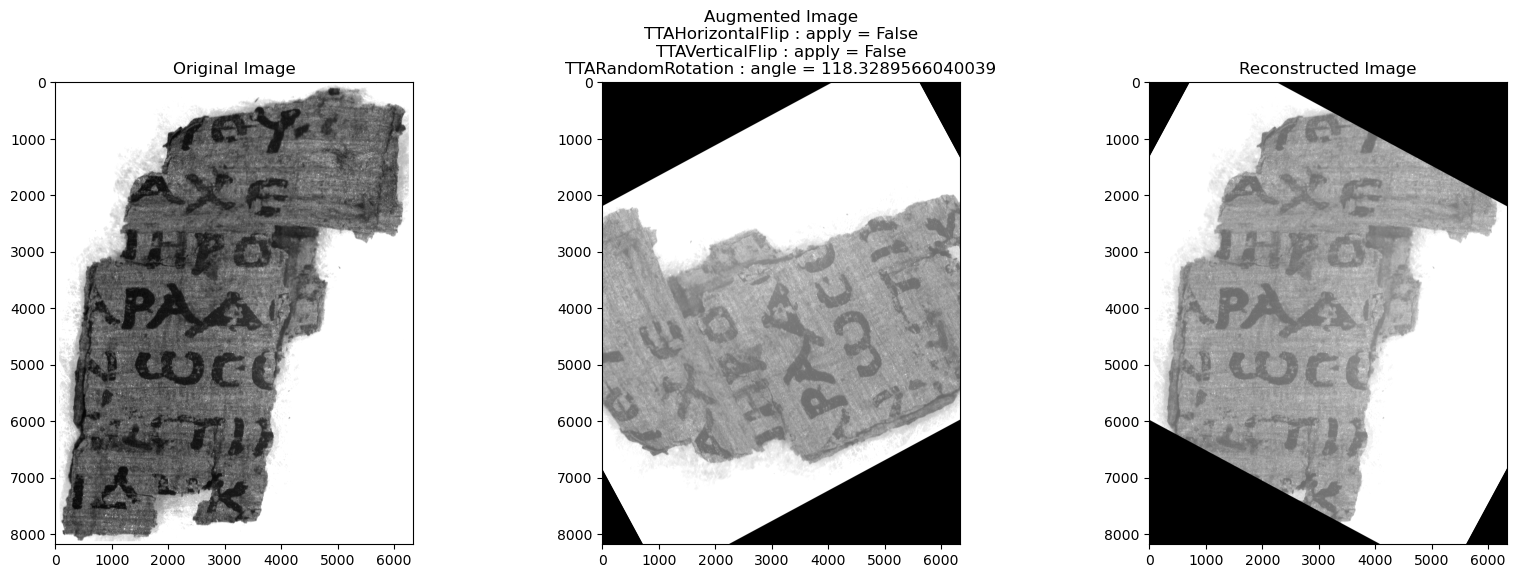

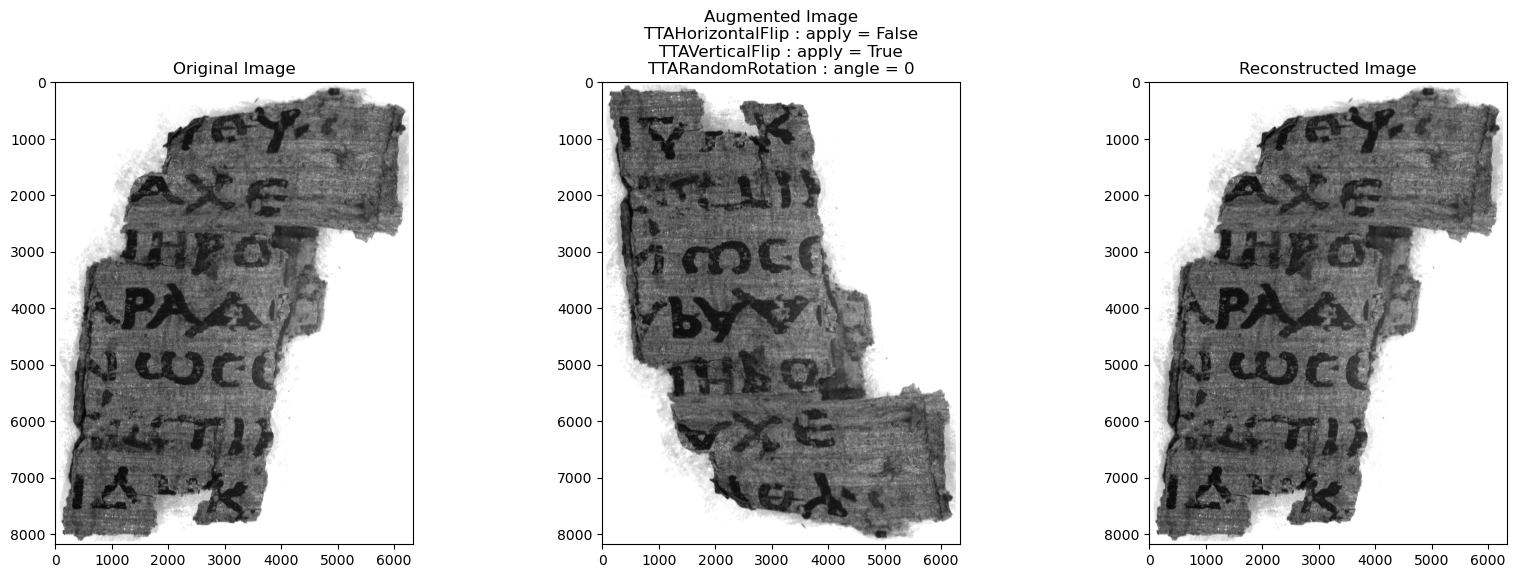

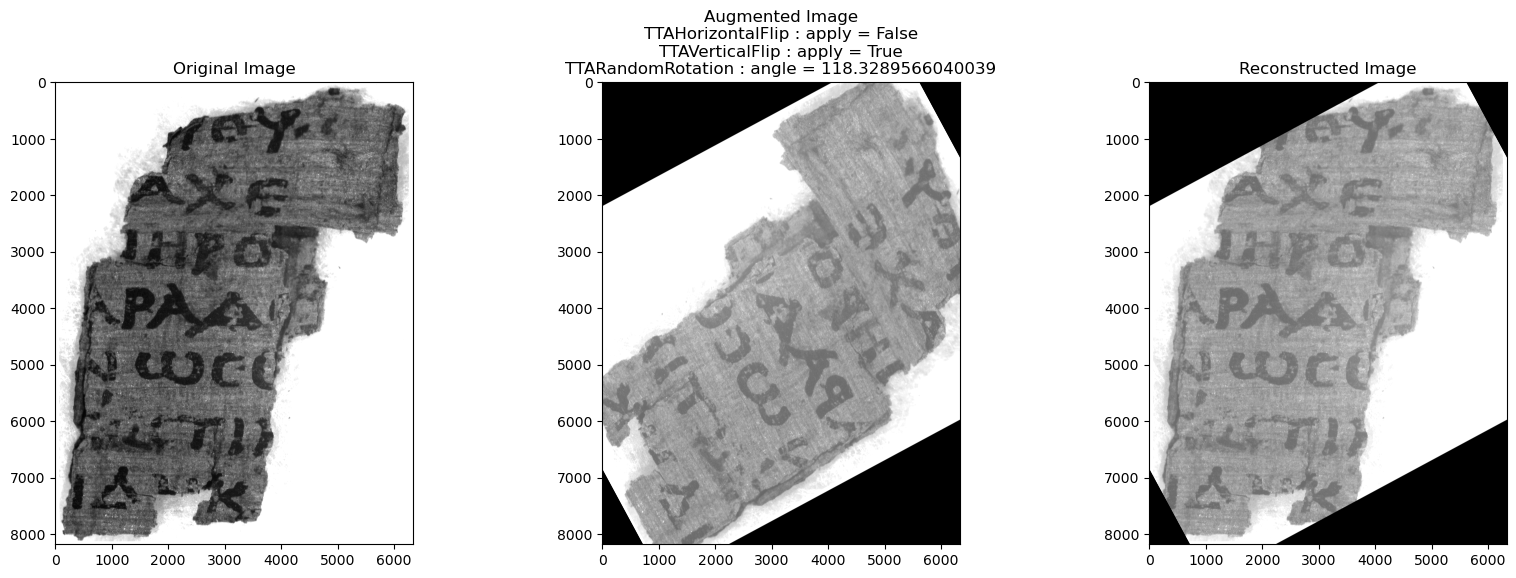

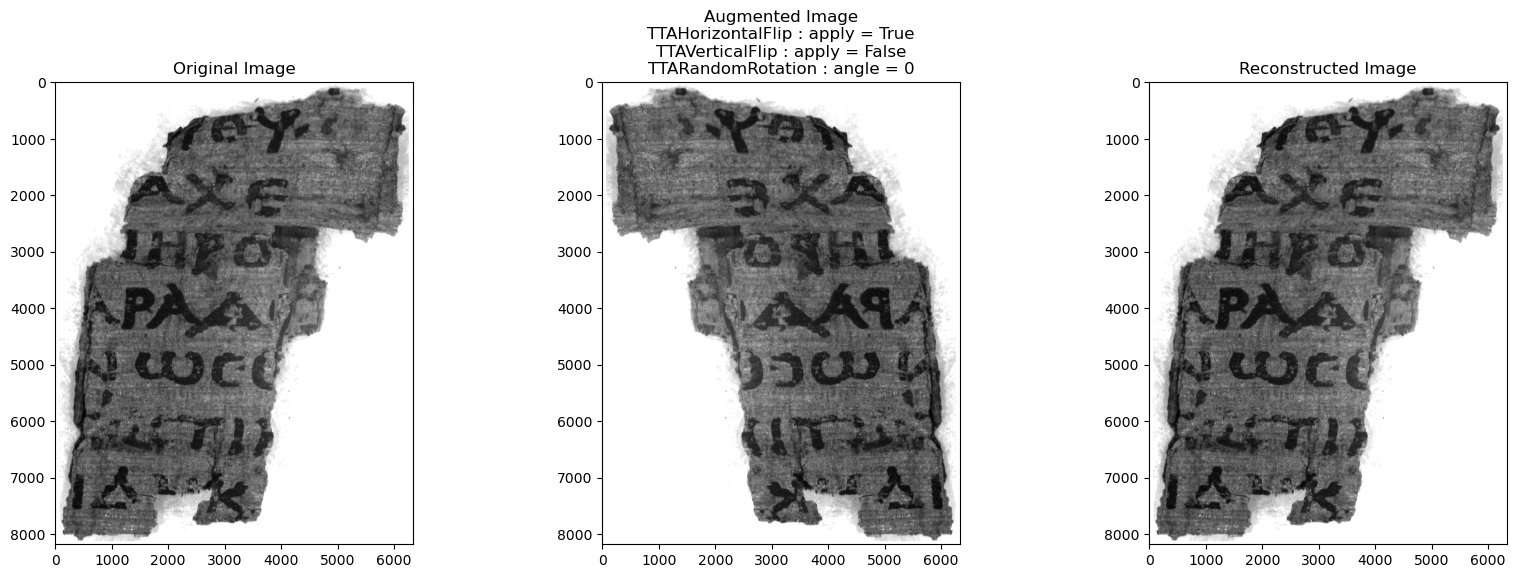

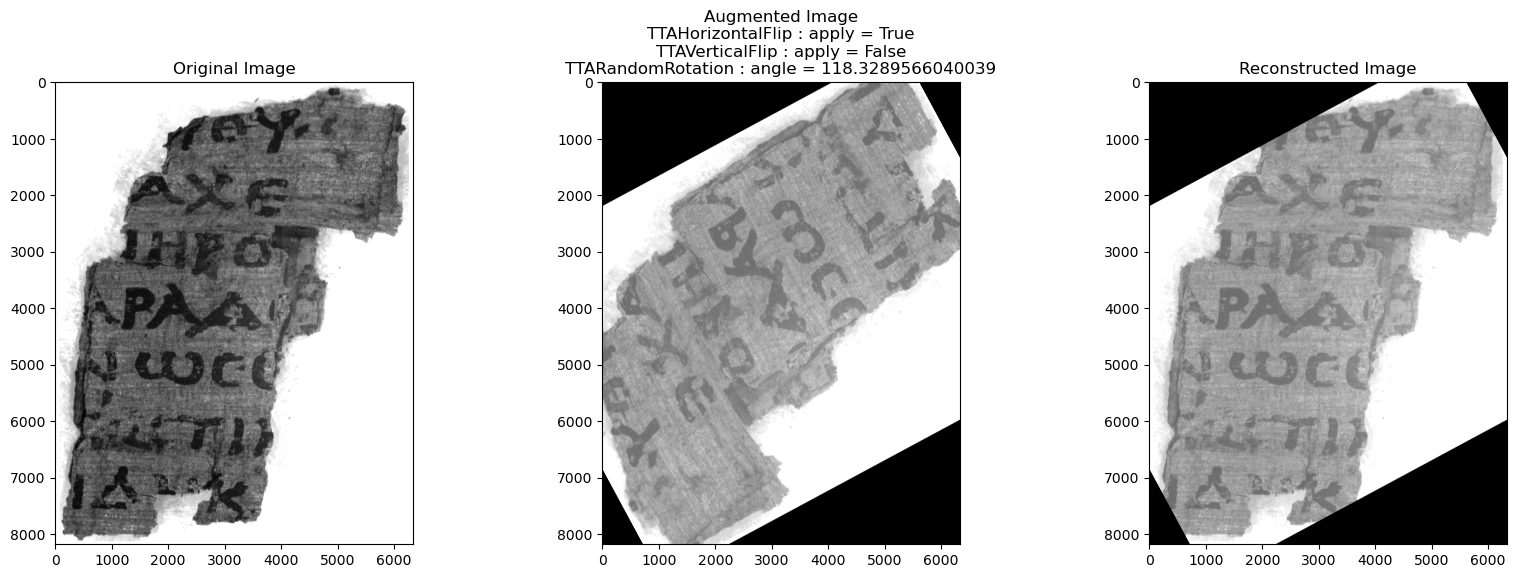

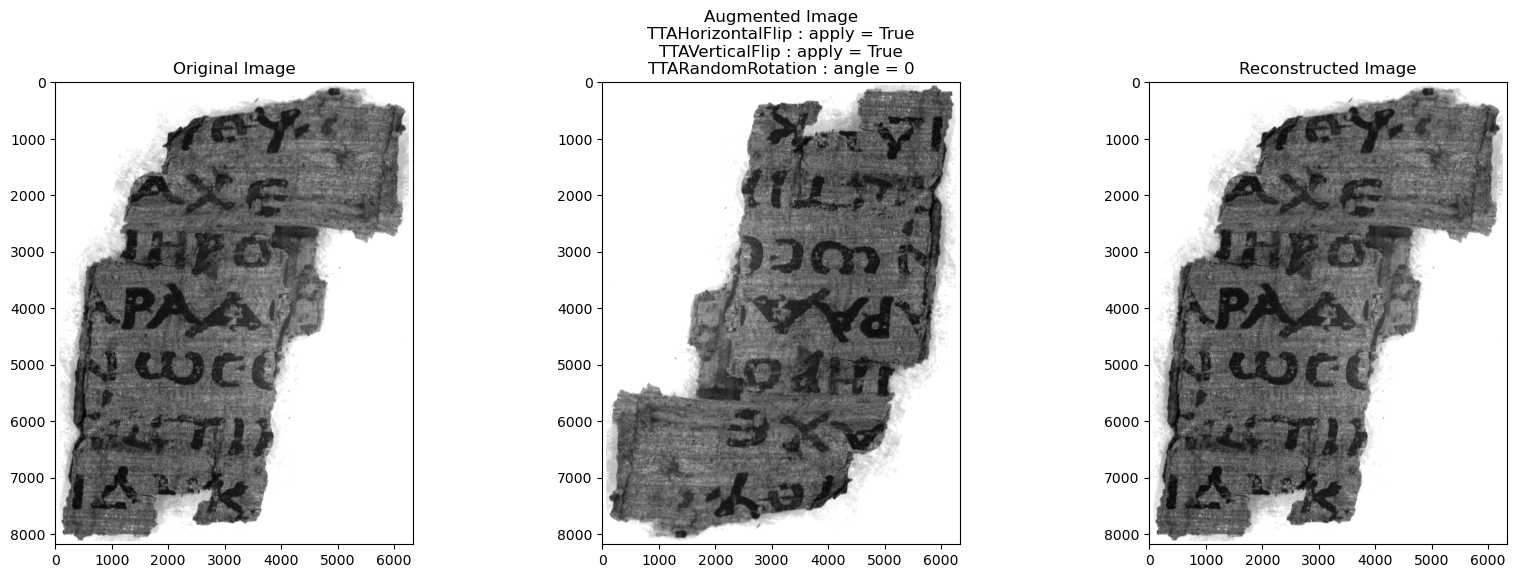

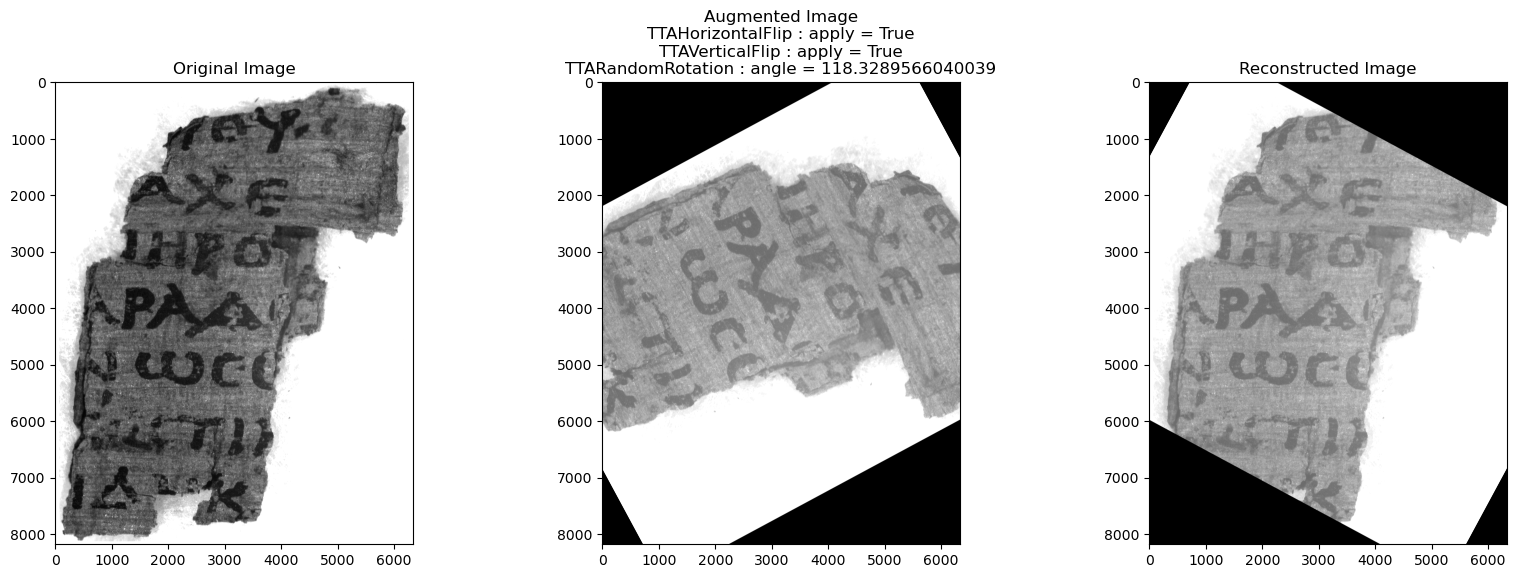

In [7]:

# Define the transformation: convert to tensor and normalize to range [0,1]
to_tensor = T.Compose([T.ToTensor()])

# Open the image file with PIL, then apply the transformation
image = Image.open(os.path.join(cst.TRAIN_FRAGMENTS_PATH, '1', 'ir.png'))
image = to_tensor(image)


transforms = tta.Compose(
    [
        TTAHorizontalFlip(),
        TTAVerticalFlip(),
        # tta.Rotate90(angles=[0, 180]),
        # tta.Scale(scales=[1, 2, 4]),
        TTARandomRotation(degree=180),
        # TTARandomPerspective(),
        # tta.Multiply(factors=[2, 3]),
        # TTAElasticTransform(alpha_sigma=[500.0, 10.0]),
    ]
)


transforms_names = [
    "\n".join([f"{str(t.__class__).split('.')[-1][:-2]} : {t.pname} = {p}" 
    for t, p in zip(transforms.aug_transforms, aug_params)])
    for aug_params in transforms.aug_transform_parameters
]
         
for i, transformer in enumerate(transforms):
    
    # print(list(map(lambda f: f.__name__, transforms.aug_transforms)))
    # augment image
    augmented_image = transformer.augment_image(image)

    deaugmented_image = transformer.deaugment_mask(augmented_image)

    # plot original and augmented images
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    # assuming your images are normalized in some way that might make them not displayable
    # as typical images, we use the clip function to make sure values are within [0,1]
    image_display = image.numpy().transpose((1, 2, 0))
    image_display = np.clip(image_display, 0, 1)

    aug_image_display = augmented_image.numpy().transpose((1, 2, 0))
    aug_image_display = np.clip(aug_image_display, 0, 1)
    
    deaug_image_display = deaugmented_image.numpy().transpose((1, 2, 0))
    deaug_image_display = np.clip(deaug_image_display, 0, 1)

    ax[0].imshow(image_display, cmap='gray')
    ax[0].title.set_text('Original Image')

    ax[1].imshow(aug_image_display, cmap='gray')
    ax[1].title.set_text(f'Augmented Image\n{transforms_names[i]}')  # Add augmentation details to the title

    # pass to model
    # model_output = model(augmented_image, another_input_data)

    ax[2].imshow(deaug_image_display, cmap='gray')
    ax[2].title.set_text(f'Reconstructed Image')  # Add augmentation details to the title

    plt.show()
    # reverse augmentation for mask and label
    # deaug_mask = transformer.deaugment_mask(model_output['mask'])
    # deaug_label = transformer.deaugment_label(model_output['label'])

    # save results
#     labels.append(deaug_mask)
#     masks.append(deaug_label)

# # reduce results as you want, e.g mean/max/min
# label = mean(labels)
# mask = mean(masks)
